In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd

In [ ]:
# dados
x = [-1, -0.77777778, -0.55555556, -0.33333333, -0.11111111,
     0.1111111111, 0.33333333, 0.55555556, 0.77777778, 1.]
y = [ -1.13956201, -0.5717999, -0.21697033, 0.5425699, 0.49406657,
     1.14972239, 1.64228553, 2.1749824, 2.64773614, 2.9568202]

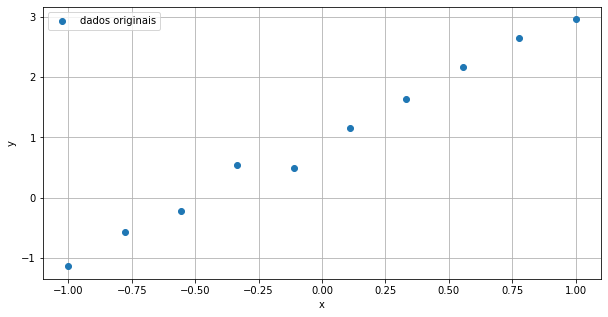

In [ ]:
#plot de dados
plt.figure(figsize=(10, 5)) # define o tamanho
plt.plot(x, y, 'o', label='dados originais') # tipo de plot
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [ ]:
# transformando para numpy e vetor coluna
x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)

In [ ]:
# modelo
from sklearn.linear_model import LinearRegression

# treinando o modelo y = a*x + b valores reais (a, b) = (2, 1)
reg = LinearRegression()
reg.fit(x, y) # treina o modelo de regressão

LinearRegression()

In [ ]:
# coeficientes a, b estimados:
# valores usando o numpy diretamente a=2.05414951 b=0.96798926
print('a estimado: ', reg.coef_.ravel()[0])
print('b estimado: ', reg.intercept_[0])

a estimado:  2.0541479571461383
b estimado:  0.9679850887740439


In [ ]:
# predições do modelo
y_pred = reg.predict(x)

In [ ]:
# score do modelo, pontuacao
score = reg.score(x, y)
print('score:', score)

score: 0.9911602232431351


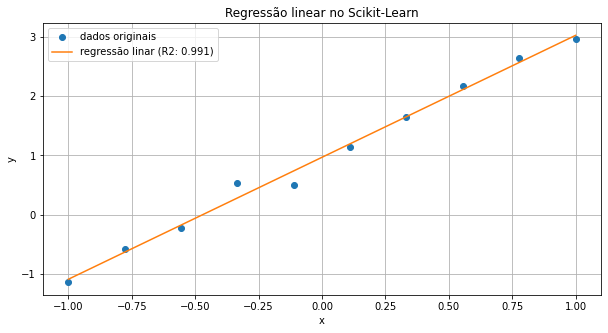

In [ ]:
#plot de dados
plt.figure(figsize=(10, 5)) # define o tamanho
plt.plot(x, y, 'o', label='dados originais') # tipo de plot
plt.plot(x, y_pred, label='regressão linar (R2: {:.3f})'.format(score)) # tipo de plot
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão linear no Scikit-Learn')
plt.grid()
plt.show()

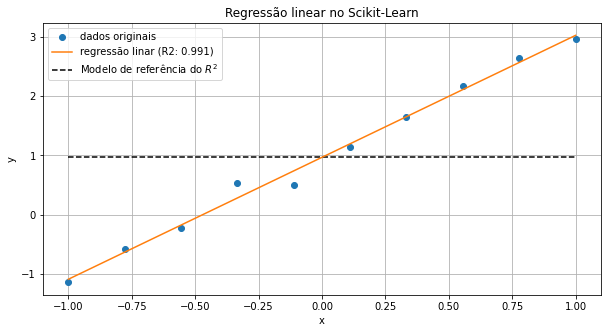

In [ ]:
#plot de dados
plt.figure(figsize=(10, 5)) # define o tamanho
plt.plot(x, y, 'o', label='dados originais') # tipo de plot
plt.plot(x, y_pred, label='regressão linar (R2: {:.3f})'.format(score)) # tipo de plot
plt.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), linestyle='dashed',
                                                label='Modelo de referência do $R^2$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão linear no Scikit-Learn')
plt.grid()
plt.show()
# demonstra a comparacao da media em comparacao ao modelo construido, 
# para a observacao de valores

In [ ]:
# função para calculo do MSE
def mse(y_true, y_pred, is_ref = False):
  #mse modelo:
  if is_ref:
    mse = ((y_true - y_true.mean())**2).mean()
  else:
    mse = ((y_true - y_pred)**2).mean()
  return mse

In [ ]:
# função para calculo do coeficiente de determinação R2
def r2(mse_reg, mse_ref):
  return 1 - mse_reg/mse_ref

In [ ]:
# vizualização do y e y_pred
print('y_true:', y.ravel())
print('y_pred:', y_pred.ravel())

y_true: [-1.13956201 -0.5717999  -0.21697033  0.5425699   0.49406657  1.14972239
  1.64228553  2.1749824   2.64773614  2.9568202 ]
y_pred: [-1.08616287 -0.62968555 -0.17320823  0.28326911  0.73974643  1.19622375
  1.65270107  2.10917841  2.56565573  3.02213305]


In [ ]:
# calculando o mse dos modeloos
mse_reg = mse(y_true=y, y_pred=y_pred)
print('MSE do modelo de regressão:', mse_reg)
mse_ref = mse(y_true=y, y_pred=y_pred, is_ref=True)
print('MSE do modelo de referencia:', mse_ref)


MSE do modelo de regressão: 0.015331681854365772
MSE do modelo de referencia: 1.7343969509704347


In [ ]:
# calculando o R2 score
r2_score = r2(mse_reg=mse_reg, mse_ref=mse_ref)
print('coeficiente R2 do modelo implementado (calculado:', r2_score)

coeficiente R2 do modelo implementado (calculado: 0.9911602232431351


In [ ]:
# score retornado pelo scikit-learn
r2_score_skl = reg.score(x, y)
print('coeficiente R2 do modelo implementado (Scikit-learn:', r2_score_skl)

coeficiente R2 do modelo implementado (Scikit-learn: 0.9911602232431351
